#BAT AGN Exploratory Analysis: Dale 2014 Model Fits

This notebook takes a look at the fitting results for the BAT AGN using the model from Dale+14.

From Dale+14:
"In the original construction of these templates (Dale et al.
2001; Dale & Helou 2002), a series of “local” SEDs were created
to represent the emission from dust exposed to a wide range of
heating intensities $0.3<U<10^5$ where $U = 1$ corresponds
to the local interstellar radiation field in the solar neighborhood.
A power-law combination of these local curves can effectively
mimic the spatially integrated (“global”) dust emission, i.e.,

$dM_{d} \propto U^{-\alpha}dU$

where $M_{d}$ is the dust mass heated by a radiation field at intensity
$U$ and the exponent $\alpha$ represents the relative contributions of
the different local SEDs."

To these local SEDs, an AGN template from Shi et al 2013 was added at different AGN MIR fractions ranging from 0 to 100% at 5 % increments. Dan kindly also provided me with the total AGN fraction over the 8-1000 micron because the AGN fractions that are provided in the model library are only for the 5-20 micron range. 

Fitting was done by maximizing the likelihood for which we used a Gaussian just like for the DecompIR fits. 

Best fit parameters and uncertainties are located in the file 'final_fit_results_dale14.csv'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(context='notebook', style='darkgrid', color_codes=True, palette='deep')

In [3]:
# Upload the fitting results
bat_fits = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/dale14_results/final_fit_results_dale14.csv', index_col=0)

In [4]:
# Remove the 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3', 'IC1657', 'IC2461',
                        'MCG-01-05-047', 'NGC788', 'NGC2655',
                        'NGC3718', 'NGC4939', 'NGC4941',
                        'NGC5033', 'NGC4235', 'CenA'])
bat_fits = bat_fits.drop(bad_sources)

Lets look at the best fit parameter distributions.

First 8-1000 micron luminosity:

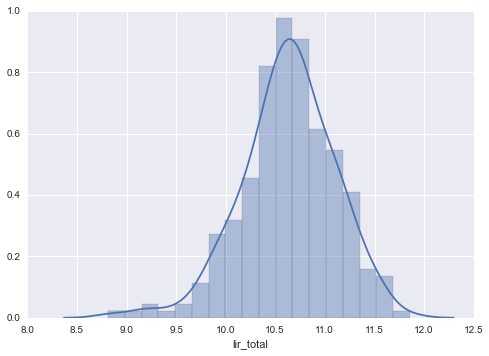

In [5]:
sn.distplot(bat_fits['lir_total'])

Looks like a Gaussian distribution with a slight tail towards low luminosity. Median looks to be out $10^{10.6} L_{\odot}$ with a spread of about 0.5 dex.

In [6]:
print 'Median LIR = ', bat_fits['lir_total'].median()
print 'Sigma LIR = ', bat_fits['lir_total'].std()

Median LIR =  10.649049335
Sigma LIR =  0.472658524093


Now lets break it up into the two components: LSB and LAGN which are the starburst and AGN components. These aren't saved in the file specifically, rather what we have is the total luminosity and the AGN fraction. So LAGN is just the AGN fraction multiplied by the total and the starburst luminosity is what's leftover after subtracting out the AGN.

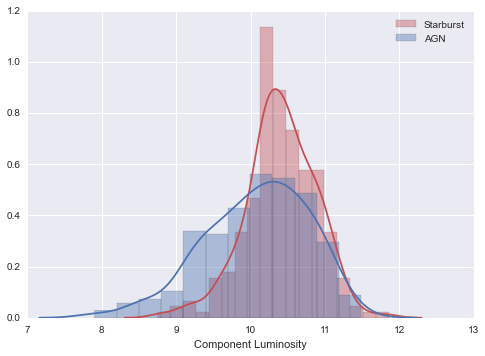

In [7]:
bat_fits['lir_agn'] = np.log10(bat_fits['agn_frac']*10**(bat_fits['lir_total']))
bat_fits['lir_sb'] = np.log10((1-bat_fits['agn_frac'])*10**(bat_fits['lir_total']))
ax = sn.distplot(bat_fits['lir_sb'], color='r')
sn.distplot(bat_fits['lir_agn'][np.isfinite(bat_fits['lir_agn'])], color='b')
ax.set_xlabel('Component Luminosity')
ax.legend(['Starburst', 'AGN'])

Just like for the Casey model fits, the AGN luminosity seems to be about the same as the starburst luminosity on average. However there is a big tail towards lower AGN luminosity.

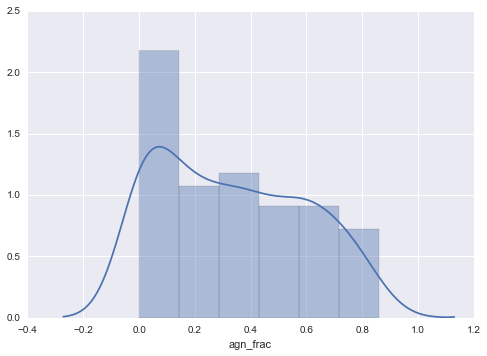

In [8]:
sn.distplot(bat_fits['agn_frac'])

Just like for the DecompIR model, there are more sources closer to 0 AGN fraction than for the Casey model.

In [9]:
print 'Median AGN Fraction = ', bat_fits['agn_frac'].median()
print 'Sigma AGN Fraction = ', bat_fits['agn_frac'].std()
print ''
print 'Median Starburst LIR = ', bat_fits['lir_sb'].median()
print 'Sigma Starburt LIR = ', bat_fits['lir_sb'].std()
print ''
print 'Median AGN LIR = ', bat_fits['lir_agn'][np.isfinite(bat_fits['lir_agn'])].median()
print 'Sigma AGN LIR = ', bat_fits['lir_agn'][np.isfinite(bat_fits['lir_agn'])].std()

Median AGN Fraction =  0.3159
Sigma AGN Fraction =  0.259649944989

Median Starburst LIR =  10.4133339989
Sigma Starburt LIR =  0.471420852537

Median AGN LIR =  10.1322838418
Sigma AGN LIR =  0.692474172096


The median AGN fraction here is even lower than for the DecompIR model at 32% compared to 38% with about the same standard deviation.

We can also look at the distribution of $\alpha$ for these galaxies.

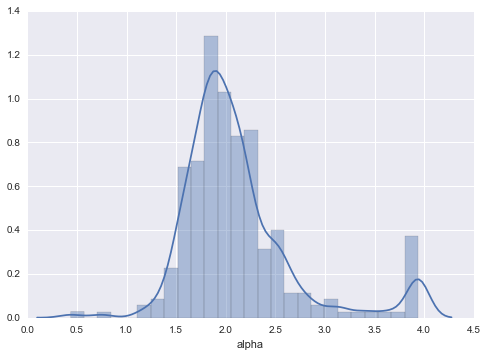

In [10]:
sn.distplot(bat_fits['alpha'])

Just as with the HRS galaxies, there seem to be two groups. One centered around $alpha=2.0$ and another at high values of alpha.

Like we did for the HRS galaxies we can see if there is the same relationship between the dust properties and $\alpha$.

In [11]:
bat_fits_casey = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/casey_bayes_results/beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior.csv', index_col=0)
bat_fits_casey = bat_fits_casey.drop(bad_sources)

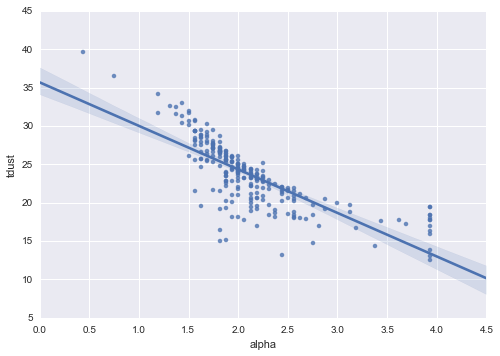

In [12]:
sn.regplot(bat_fits['alpha'], bat_fits_casey['tdust'])


It sure looks to be about the same relationship although with slightly more scatter maybe. Its hard to tell without plotting the HRS galaxies on the same figure. But just as with the HRS galaxies, all of the sources with $\alpha=3.975$ have a dust temperature less than 20 K.

The final thing I want to look at is the correlation between the AGN IR luminosity and the X-ray luminosity.

In [13]:
bat_flux = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_bat_flux.csv', index_col=0)
bat_info = pd.read_csv('/Users/ttshimiz/Github/bat-data/bat_info.csv', index_col=0)
bat_fits['LBAT'] = 4*np.pi*(bat_info['Dist_[Mpc]']*10**6*3.09e18)**2*bat_flux['BAT_flux']

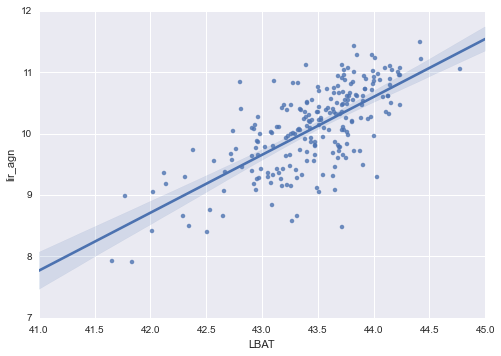

In [18]:
sn.regplot(np.log10(bat_fits['LBAT'][np.isfinite(bat_fits['lir_agn'])]), bat_fits['lir_agn'][np.isfinite(bat_fits['lir_agn'])])

(41.0, 45.0)

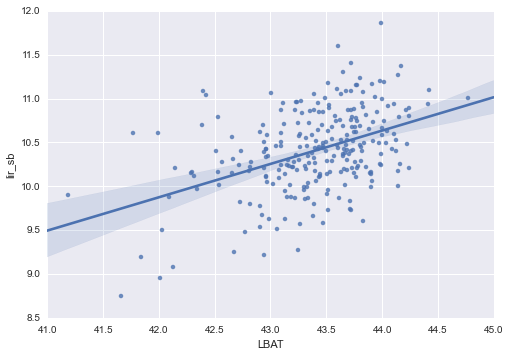

In [29]:
sn.regplot(x=np.log10(bat_fits['LBAT']), y=bat_fits['lir_sb'], lowess=False)
plt.ylim(8.5, 12.0)
plt.xlim(41.0, 45.0)

In [22]:
from scipy.stats import spearmanr, pearsonr
ind_use = bat_fits['lir_agn'] > 5.0
lbat_lagnIR_spearman = spearmanr(np.log10(bat_fits['LBAT'][ind_use]), np.log10(bat_fits['lir_agn'][ind_use]))
lbat_lsf_spearman = spearmanr(np.log10(bat_fits['LBAT']), np.log10(bat_fits['lir_sb']))

lbat_lagnIR_pearson = pearsonr(np.log10(bat_fits['LBAT'][ind_use]), np.log10(bat_fits['lir_agn'][ind_use]))
lbat_lsf_pearson = pearsonr(np.log10(bat_fits['LBAT']), np.log10(bat_fits['lir_sb']))

In [23]:
print 'Spearman Rank Correlation Coefficients:'
print 'LBAT vs LAGN_IR: ', lbat_lagnIR_spearman[0]
print 'LBAT vs LSF: ', lbat_lsf_spearman[0]
print ''
print 'Pearson Rank Correlation Coefficients:'
print 'LBAT vs LAGN_IR: ', lbat_lagnIR_pearson[0]
print 'LBAT vs LSF: ', lbat_lsf_pearson[0]

Spearman Rank Correlation Coefficients:
LBAT vs LAGN_IR:  0.666952035658
LBAT vs LSF:  0.39393231807

Pearson Rank Correlation Coefficients:
LBAT vs LAGN_IR:  0.697286924773
LBAT vs LSF:  0.440388787138


Just as with the DecompIR model, this model does better than the Casey model in terms of its correlation with X-ray luminosity. In fact the Dale+14 model does better than the DecompIR model as well, making it the best out of the three models.